In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="white")

In [2]:
# hmap_labels = ["None", "myelinmap", "thickness", "synapticden", "ndi", "odi", "SAaxis", "ahbaPC1", "layer4PC1", "megtimescale", "eiratio3.2"]
hmap_labels = ["None", "myelinmap"]
id = 12

# hmap_labels_plotting = ["Homogeneous", "T1w/T2w", "cortical thickness", "synaptic density", "NDI", "ODI", "SA  Axis", "PC1 gene", "PC1 gene (L4)", "MEG timescale", "E:I ratio"]
hmap_labels_plotting = ["Homogeneous", "T1w/T2w"]

## Results optimised for combined metric

In [3]:
edge_fc, node_fc, fcd, fc = [], [], [], []
alpha_best, r_best = {}, {}
for hmap_label in hmap_labels:
    file = f"{PROJ_DIR}/results/model_rs/crossval/id-{id}/{hmap_label}_results.hdf5"

    with h5py.File(file, 'r') as f:
        edge_fc.append(np.array(f['edge_fc_test'][:]).flatten())
        node_fc.append(np.array(f['node_fc_test'][:]).flatten())
        fcd.append(np.array(f['fcd_test'][:]).flatten())

        best_comb = np.mean(np.array(f['best_combs'][:]), axis=0)
        alpha_best[hmap_label] = best_comb[0]
        r_best[hmap_label] = best_comb[1]

        fc.append(np.mean(np.array(f['fc_test'][:]), axis=2))

print(f"alpha_best: {alpha_best}")
print(f"r_best: {r_best}")

alpha_best: {'None': 0.0, 'myelinmap': 1.599999999999999}
r_best: {'None': 28.9, 'myelinmap': 28.899999999999995}


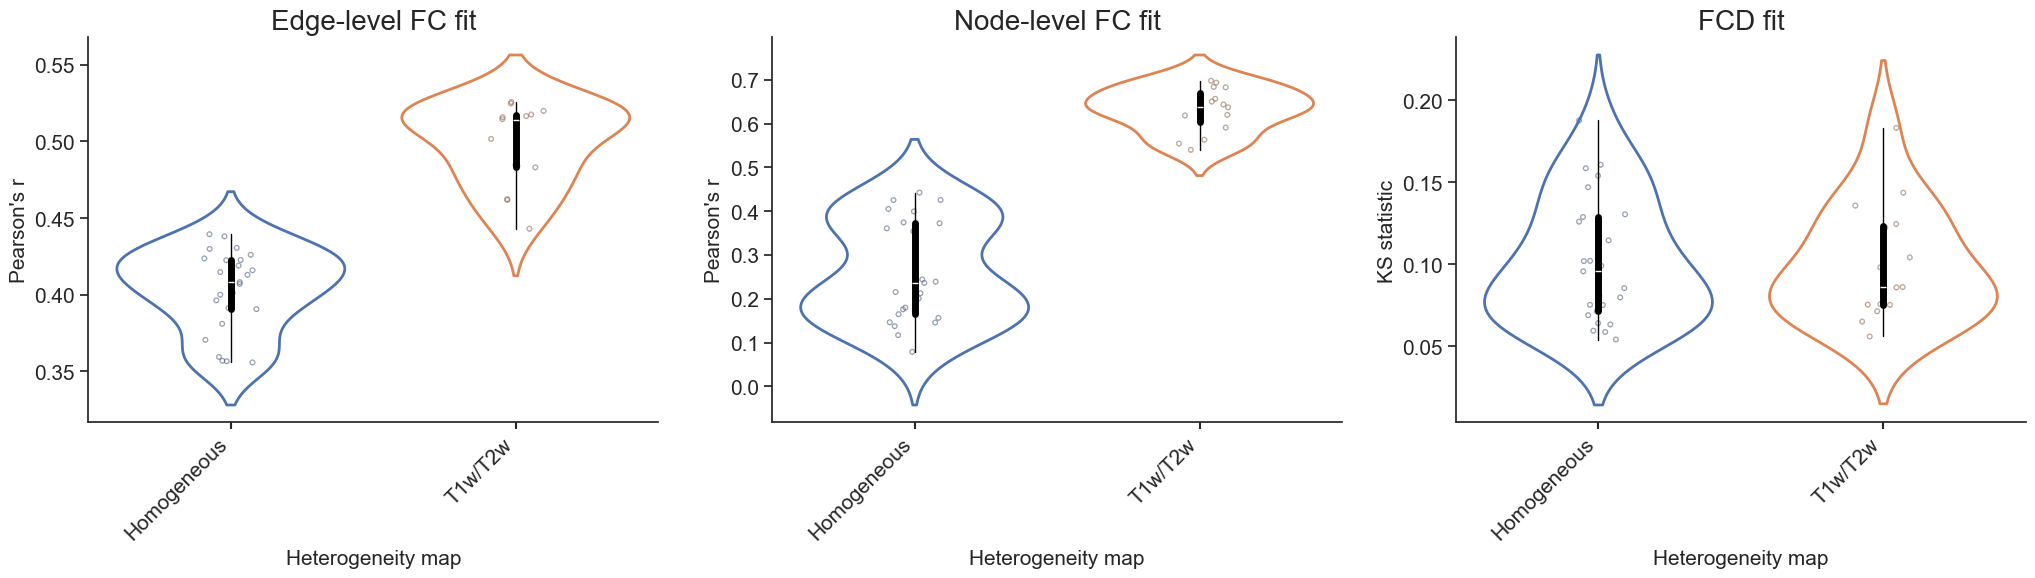

In [4]:
import matplotlib as mpl

# Set plotting defaults
fs_ax = 15
fs_title = 20
plt.rcParams['xtick.major.size'] = 5
plt.rcParams['xtick.major.width'] = 1.5
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.left'] = True

fig, axs = plt.subplots(1, 3, figsize=(25, 5))
axs = axs.flatten()

pnts = np.linspace(0, np.pi * 2, 24)
circ = np.c_[np.sin(pnts) / 2, -np.cos(pnts) / 2]
vert = np.r_[circ, circ[::-1] * .7]
open_circle = mpl.path.Path(vert)

# Plot edge-level fc
sns.stripplot(data=edge_fc, ax=axs[0], marker=open_circle, size=4, alpha=0.5, zorder=1, linewidth=0.3)
sns.violinplot(data=edge_fc, ax=axs[0], density_norm="count", fill=False, linewidth=2, inner="box", inner_kws={"box_width": 5, "whis_width": 1, "color": "black"})
axs[0].set_xticks(ticks=range(len(hmap_labels_plotting)))
axs[0].set_xticklabels(labels=hmap_labels_plotting, ha='right', fontsize=15)
axs[0].tick_params(axis='x', labelrotation=45)
axs[0].tick_params(axis='y', labelsize=fs_ax)
axs[0].set_title("Edge-level FC fit", fontsize=fs_title)
axs[0].set_xlabel("Heterogeneity map", fontsize=fs_ax)
axs[0].set_ylabel("Pearson's r", fontsize=fs_ax)
axs[0].spines['top'].set_visible(False)
axs[0].spines['right'].set_visible(False)
# for i, violin in enumerate(axs[0].collections[:len(hmap_labels)]):  # ::2 to skip the body parts, focusing on the borders
#     violin.set_edgecolor(sns.color_palette()[i])
#     violin.set_linewidth(2)

# Plot node-level fc
sns.stripplot(data=node_fc, ax=axs[1], marker=open_circle, size=4, alpha=0.5, zorder=1, linewidth=0.3)
sns.violinplot(data=node_fc, ax=axs[1], density_norm="count", fill=False, linewidth=2, inner="box", inner_kws={"box_width": 5, "whis_width": 1, "color": "black"})
axs[1].set_xticks(ticks=range(len(hmap_labels_plotting)), labels=hmap_labels_plotting, ha='right', fontsize=15)
axs[1].tick_params(axis='x', labelrotation=45)
axs[1].tick_params(axis='y', labelsize=fs_ax)
axs[1].set_title("Node-level FC fit", fontsize=fs_title)
axs[1].set_xlabel("Heterogeneity map", fontsize=fs_ax)
axs[1].set_ylabel("Pearson's r", fontsize=fs_ax)
axs[1].spines['top'].set_visible(False)
axs[1].spines['right'].set_visible(False)

# Plot FCD
sns.stripplot(data=fcd, ax=axs[2], marker=open_circle, size=4, alpha=0.5, zorder=1, linewidth=0.3)
sns.violinplot(data=fcd, ax=axs[2], density_norm="count", fill=False, linewidth=2, inner="box", inner_kws={"box_width": 5, "whis_width": 1, "color": "black"})
axs[2].set_xticks(ticks=range(len(hmap_labels_plotting)), labels=hmap_labels_plotting, ha='right', fontsize=15)
axs[2].tick_params(axis='x', labelrotation=45)
axs[2].tick_params(axis='y', labelsize=fs_ax)
axs[2].set_title("FCD fit", fontsize=fs_title)
axs[2].set_xlabel("Heterogeneity map", fontsize=fs_ax)
axs[2].set_ylabel("KS statistic", fontsize=fs_ax)
axs[2].spines['top'].set_visible(False)
axs[2].spines['right'].set_visible(False)

plt.show()

In [5]:
len(axs[0].collections)

4

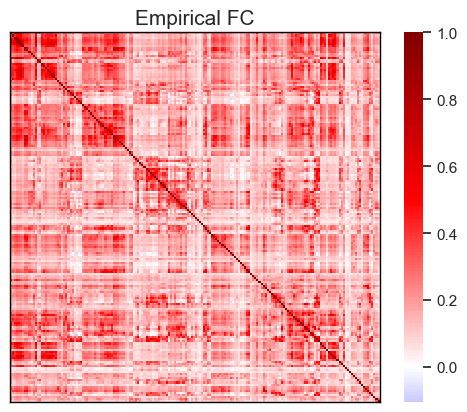

In [6]:
# Plot empirical FC
fc_emp = h5py.File(f"{PROJ_DIR}/data/empirical/HCP_unrelated-445_rfMRI_hemi-L_nsubj-384_parc-glasser360_FCavg.hdf5")["fc"]
sns.heatmap(fc_emp, cmap="seismic", xticklabels=False, yticklabels=False, cbar=True, square=True, center=0)
plt.title("Empirical FC", fontsize=15)
for _, spine in plt.gca().spines.items():
        spine.set_visible(True)
        spine.set_color('black')
        spine.set_linewidth(1)
plt.show()

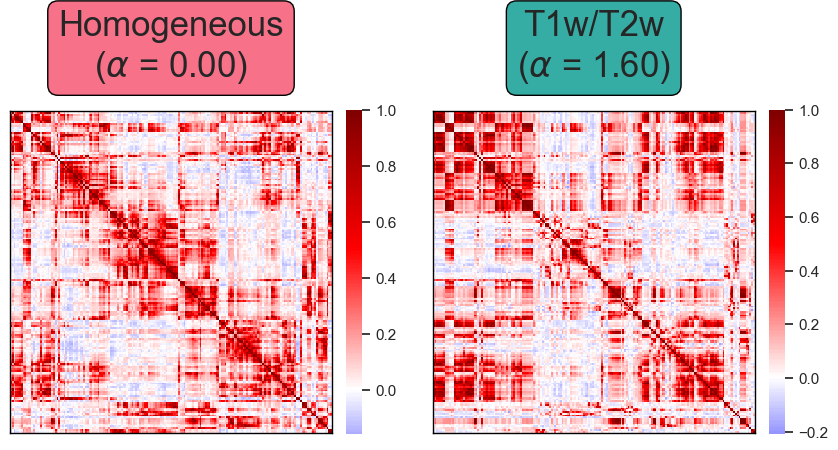

In [7]:
# Plot FC (averaged across test runs and splits) for each map
hmap_labels_plotting_alpha = [f"{label}\n($\\alpha$ = {alpha_best[hmap_label]:.2f})" for label, hmap_label in zip(hmap_labels_plotting, hmap_labels)]

fig, axs = plt.subplots(1, len(hmap_labels), figsize=(5*len(hmap_labels), 5))
for i, hmap_label in enumerate(hmap_labels):
    vmin = np.nanpercentile(fc[i], 5)
    vmax = np.nanpercentile(fc[i], 95)
    sns.heatmap(fc[i], ax=axs[i], cmap="seismic", center=0, square=True, cbar=True, xticklabels=[], yticklabels=[], cbar_kws=dict(fraction=0.046, pad=0.04))
    axs[i].set_title(hmap_labels_plotting_alpha[i], fontsize=25, bbox=dict(facecolor=sns.color_palette("husl", len(hmap_labels))[i], edgecolor='black', boxstyle='round,pad=0.3'), pad=25)
    # Set frame around heatmap
    for _, spine in axs[i].spines.items():
        spine.set_visible(True)
        spine.set_color('black')
        spine.set_linewidth(1)

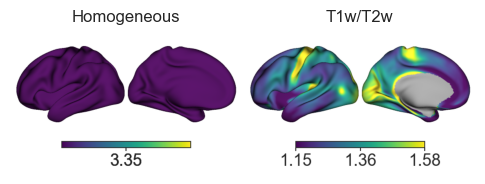

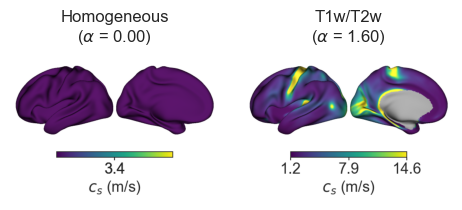

In [8]:
# Plot c_s maps
import nibabel as nib
from neuromaps.datasets import fetch_atlas
from heteromodes.utils import load_hmap, scale_hmap, unmask
from heteromodes.plotting import plot_brain

den = "32k"
fslr = fetch_atlas("fslr", den)
surf = fslr["inflated"][0]
medmask = nib.load(fslr["medial"][0]).darrays[0].data.astype(bool)

# Plot c maps with best alpha
hmap_data_orig, hmap_data_scaled = [], []
for hmap_label in hmap_labels:
    if hmap_label == "None":
        hmap_data_orig.append(np.ones(len(medmask))*3.3524)
        hmap_data_scaled.append(np.ones(len(medmask))*3.3524)
        continue

    hmap = load_hmap(hmap_label, den)
    hmap_data_orig.append(unmask(hmap[medmask], medmask))

    hmap_scaled = scale_hmap(hmap[medmask], alpha=alpha_best[hmap_label], sigma=0, method="zscore")
    hmap_scaled = 3.3524 * hmap_scaled # Convert back to c_s
    hmap_data_scaled.append(unmask(hmap_scaled, medmask))
hmap_data_orig = np.array(hmap_data_orig).T
hmap_data_scaled = np.array(hmap_data_scaled).T

fig1 = plot_brain(surf, hmap_data_orig, labels=hmap_labels_plotting, clim_q=(5, 95), cbar=True,
                  cbar_kws=dict(fontsize=25))
fig2 = plot_brain(surf, hmap_data_scaled, labels=hmap_labels_plotting_alpha, clim_q=(5, 95), 
                  cbar=True, cbar_label="$c_s$ (m/s)", cbar_kws=dict(fontsize=25, decimals=1))

## Compare results from 2 different ids

In [24]:
hmap_labels2 = ["None", "myelinmap"]
ids2 = [11, 12]
ids2_labels = ["No filtering", "Band-pass (0.04 - 0.07 Hz)"]  

edge_fc2, node_fc2, fcd2, fc2 = [], [], [], []
for hmap_label in hmap_labels2:
    for id in ids2:
        file = f"{PROJ_DIR}/results/model_rs/crossval/id-{id}/{hmap_label}_results.hdf5"

        with h5py.File(file, 'r') as f:
            edge_fc2.append(np.array(f['edge_fc_test'][:]).flatten())
            node_fc2.append(np.array(f['node_fc_test'][:]).flatten())
            # fcd2.append(1 - np.array(f['fcd_test'][:]).flatten())

            # fc2.append(np.mean(np.array(f['fc_test'][:]), axis=2))

# Append the mean values of each array to make them the same length
edge_fc2[-1] = np.concatenate((edge_fc2[-1], np.full(10, np.mean(edge_fc2[-1]))))
node_fc2[-1] = np.concatenate((node_fc2[-1], np.full(10, np.mean(node_fc2[-1]))))
# fcd2[-1] = np.concatenate((fcd2[-1], np.full(10, np.mean(fcd2[-1]))))

Text(0.5, 0, 'Heterogeneity map')

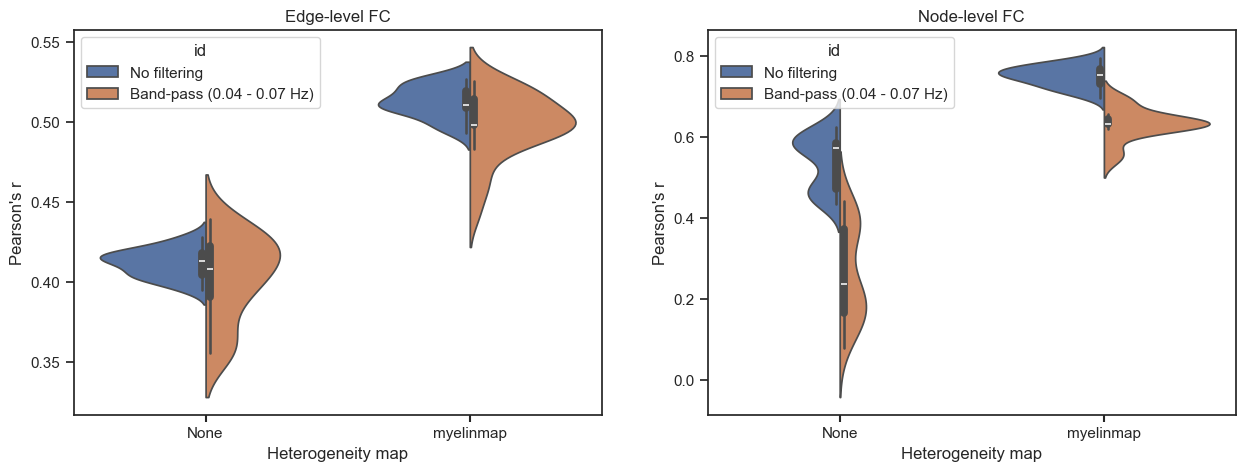

In [32]:
import pandas as pd

# Reshape the within-network correlations for plotting
edge_fc_df = pd.DataFrame(
    np.array(edge_fc2).T,
    columns = pd.MultiIndex.from_product([hmap_labels2, ids2_labels], names=["hmap", "id"])
).melt(var_name=["hmap", "id"], value_name="Pearson's r")
node_fc_df = pd.DataFrame(
    np.array(node_fc2).T,
    columns = pd.MultiIndex.from_product([hmap_labels2, ids2_labels], names=["hmap", "id"])
).melt(var_name=["hmap", "id"], value_name="Pearson's r")
# fcd_df = pd.DataFrame(
#     np.array(fcd2).T,
#     columns = pd.MultiIndex.from_product([hmap_labels2, ids2], names=["hmap", "id"])
# ).melt(var_name=["hmap", "id"], value_name="metric")

fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs = axs.flatten()

sns.violinplot(data=edge_fc_df, x="hmap", y="Pearson's r", hue="id", ax=axs[0], split=True, palette=sns.color_palette(n_colors=2))
axs[0].set_title("Edge-level FC")
axs[0].set_xlabel("Heterogeneity map")

sns.violinplot(data=node_fc_df, x="hmap", y="Pearson's r", hue="id", ax=axs[1], split=True, palette=sns.color_palette(n_colors=2))
axs[1].set_title("Node-level FC")
axs[1].set_xlabel("Heterogeneity map")

# sns.violinplot(data=fcd_df, x="hmap", y="metric", hue="id", ax=axs[2], split=True, palette=sns.color_palette(n_colors=2))
# axs[2].set_title("1 - FCD")
# axs[2].set_xlabel("Heterogeneity map")

## Results optimised for each metric separately (i.e. best alpha for each metric)

In [ ]:
edge_fc_best, node_fc_best, fcd_best = [], [], []
edgefc_bestalpha, nodefc_bestalpha, fcd_bestalpha = {}, {}, {}
alpha_vals = np.arange(-5, 5.5, 0.5)
for hmap_label in hmap_labels:
    file = f"{PROJ_DIR}/results/model_rs/crossval/id-{id}/{hmap_label}/results.hdf5"

    with h5py.File(file, 'r') as f:
        if hmap_label == "None":
            edge_fc_best.append(np.array(f['edge_fc_test'][:]).flatten())
            node_fc_best.append(np.array(f['node_fc_test'][:]).flatten())
            fcd_best.append(1 - np.array(f['fcd_test'][:]).flatten())

            edgefc_bestalpha[hmap_label] = 0
            nodefc_bestalpha[hmap_label] = 0
            fcd_bestalpha[hmap_label] = 0
        else:
            # assert len(alpha_vals) == np.shape(f[f'edge_fc_train'][:])[1]

            edgefc_bestind = np.argmax(np.mean(f[f'edge_fc_train'][:], axis=(0, 2)))
            nodefc_bestind = np.argmax(np.mean(f[f'node_fc_train'][:], axis=(0, 2)))
            fcd_bestind = np.argmin(np.mean(f[f'fcd_train'][:], axis=(0, 2)))

            edge_fc_best.append(np.array(f[f'edge_fc_train'][:])[:, edgefc_bestind, :].flatten())
            node_fc_best.append(np.array(f[f'node_fc_train'][:])[:, nodefc_bestind, :].flatten())
            fcd_best.append(1 - np.array(f[f'fcd_train'][:])[:, fcd_bestind, :].flatten())

            edgefc_bestalpha[hmap_label] = alpha_vals[edgefc_bestind]
            nodefc_bestalpha[hmap_label] = alpha_vals[nodefc_bestind]
            fcd_bestalpha[hmap_label] = alpha_vals[fcd_bestind]

print(edgefc_bestalpha)
print(nodefc_bestalpha)
print(fcd_bestalpha)

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(20, 5))
axs = axs.flatten()

labels = hmap_labels

sns.violinplot(data=edge_fc_best, ax=axs[0])
axs[0].set_xticks(ticks=range(len(hmap_labels)), labels=hmap_labels)
axs[0].tick_params(axis='x', labelrotation=45)
axs[0].set_title("Edge-level FC")
axs[0].set_xlabel("Heterogeneity map")

sns.violinplot(data=node_fc_best, ax=axs[1])
axs[1].set_xticks(ticks=range(len(hmap_labels)), labels=hmap_labels)
axs[1].tick_params(axis='x', labelrotation=45)
axs[1].set_title("Node-level FC")
axs[1].set_xlabel("Heterogeneity map")

sns.violinplot(data=fcd_best, ax=axs[2])
axs[2].set_xticks(ticks=range(len(hmap_labels)), labels=hmap_labels)
axs[2].tick_params(axis='x', labelrotation=45)
axs[2].set_title("1 - FCD")
axs[2].set_xlabel("Heterogeneity map")